In [15]:
import seaborn as sns
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [16]:
PATH = Path("/kaggle/input/recommender-systems-challenge-2024/ebnerd_")

In [43]:
def load_history_behaviors(bundle = "large", split = "train", filename = "behaviors"):
    print("I'm loading {} from {}, bundle: {}".format(filename,split, bundle))
    return pl.read_parquet(Path(str(PATH) + bundle).joinpath(split,filename+".parquet"))

In [49]:
def load_articles(bundle = "large"):
    print("I'm loading articles bundle: {}".format(bundle))
    return pl.read_parquet(Path(str(PATH) + bundle).joinpath("articles.parquet"))

In [54]:
df_behaviors_train = load_dataset_parquet(bundle = "large",split = "train", filename = "behaviors")

I'm loading behaviors from train, bundle: large


In [55]:
df_behaviors_train.shape

(12063890, 17)

In [56]:
df_behaviors_train.columns

['article_id',
 'title',
 'subtitle',
 'last_modified_time',
 'premium',
 'body',
 'published_time',
 'image_ids',
 'article_type',
 'url',
 'ner_clusters',
 'entity_groups',
 'topics',
 'category',
 'subcategory',
 'category_str',
 'total_inviews',
 'total_pageviews',
 'total_read_time',
 'sentiment_score',
 'sentiment_label']

In [75]:
df_scroll = df_behaviors_train['scroll_percentage']
df_scroll

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
12063885   NaN
12063886   NaN
12063887   NaN
12063888   NaN
12063889   NaN
Name: scroll_percentage, Length: 12063890, dtype: float32

In [76]:
ROWS = len(df_scroll)
ROWS

12063890

In [77]:
NOT_NULL = df_scroll.count()
NOT_NULL


3539988

In [78]:
NULL = ROWS-NOT_NULL
NULL

8523902

In [79]:
df_scroll = df_scroll.fillna(120)

In [80]:
df_scroll

0           120.0
1           120.0
2           120.0
3           120.0
4           120.0
            ...  
12063885    120.0
12063886    120.0
12063887    120.0
12063888    120.0
12063889    120.0
Name: scroll_percentage, Length: 12063890, dtype: float32

In [81]:
values = df_scroll.value_counts()
val_ordered = values.sort_values(ascending=False)
val_ordered


scroll_percentage
120.0    8523902
100.0    3502181
99.0         565
95.0         531
98.0         521
          ...   
4.0            4
2.0            2
3.0            1
1.0            1
0.0            1
Name: count, Length: 102, dtype: int64

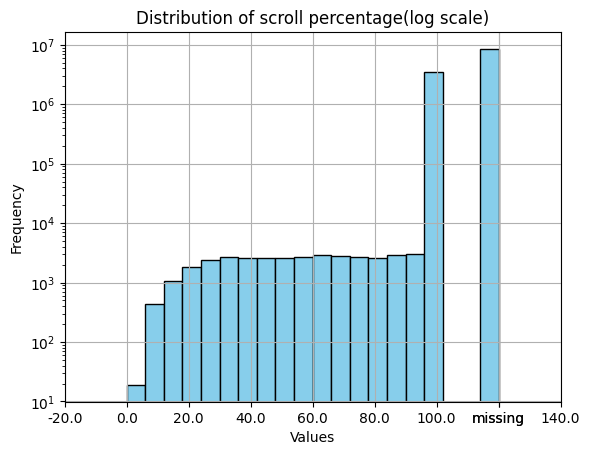

In [82]:
# Plot the distribution
plt.hist(df_scroll, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of scroll percentage(log scale)')
plt.xticks(list(plt.xticks()[0]) + [120], list(plt.xticks()[0]) + ['missing'])
plt.grid(True)
plt.show()

In [83]:
df_read_time = df_behaviors_train['read_time']
df_read_time

0           20.0
1           13.0
2           17.0
3           27.0
4           48.0
            ... 
12063885     9.0
12063886    13.0
12063887    13.0
12063888    35.0
12063889    28.0
Name: read_time, Length: 12063890, dtype: float32

In [84]:
NOT_NULL = df_read_time.count()
NOT_NULL

12063890

In [85]:
NULL = ROWS-NOT_NULL
NULL

0

In [86]:
values = df_read_time.value_counts()
val_ordered = values.sort_values(ascending=False)
val_ordered

read_time
10.0      434471
9.0       434188
8.0       425216
11.0      423836
12.0      403982
           ...  
1680.0        13
1779.0        12
1644.0        12
1762.0        12
1639.0         8
Name: count, Length: 1801, dtype: int64

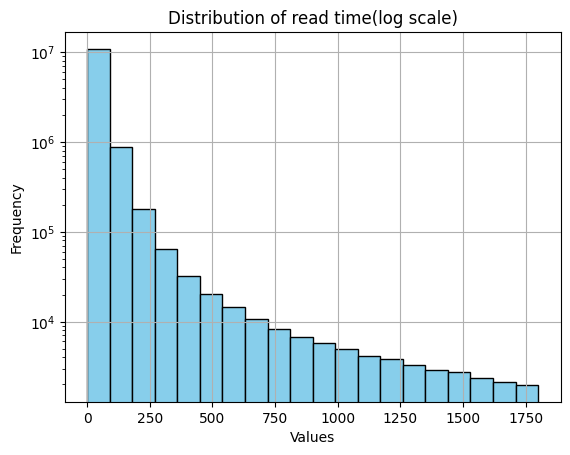

In [87]:
# Plot the distribution
plt.hist(df_read_time, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of read time(log scale)')
plt.grid(True)
plt.show()

In [88]:
df_behaviors_train['hour_day'] = pd.to_datetime(df_behaviors_train['impression_time']).dt.hour
df_behaviors_train['impression_time']

0          2023-05-21 21:35:07
1          2023-05-21 21:32:33
2          2023-05-21 21:33:32
3          2023-05-21 21:38:17
4          2023-05-21 21:36:02
                   ...        
12063885   2023-05-18 10:27:05
12063886   2023-05-18 10:30:39
12063887   2023-05-18 10:27:28
12063888   2023-05-18 10:08:18
12063889   2023-05-18 10:29:10
Name: impression_time, Length: 12063890, dtype: datetime64[us]

In [89]:
df_behaviors_train['hour_day'].value_counts()

hour_day
6     820742
5     793952
7     760661
19    692966
18    675504
20    649616
17    639444
4     631992
15    610748
14    597860
16    571842
8     567225
13    562361
12    552503
10    550013
9     525011
11    502722
21    429008
3     339383
22    217010
2     125676
23    104296
1      71884
0      71471
Name: count, dtype: int64

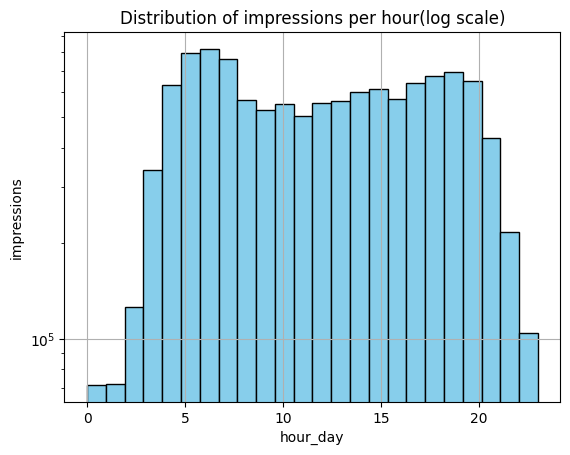

In [90]:
# Plot the distribution
plt.hist(df_behaviors_train['hour_day'], bins=24, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('hour_day')
plt.ylabel('impressions')
plt.yscale('log')
plt.title('Distribution of impressions per hour(log scale)')
plt.grid(True)
plt.show()

In [91]:

correlation_matrix = df_behaviors_train[['read_time', 'hour_day']].corr()
correlation_matrix

,read_time,hour_day
read_time,1.00000,-0.00448
hour_day,-0.00448,1.00000


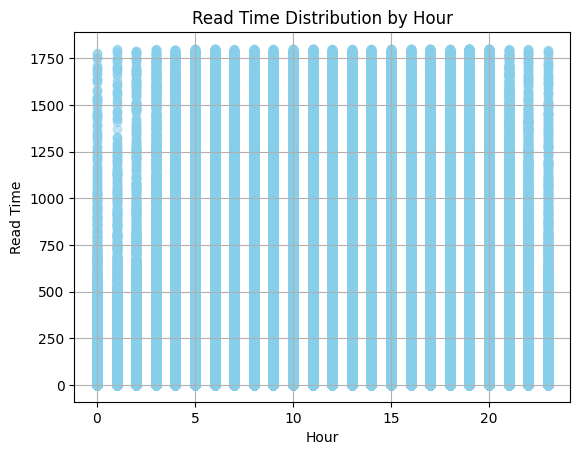

In [92]:
# Scatter plot
plt.scatter(df_behaviors_train['hour_day'], df_behaviors_train['read_time'], alpha=0.5, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Read Time')
plt.title('Read Time Distribution by Hour')
plt.grid(True)
plt.show()

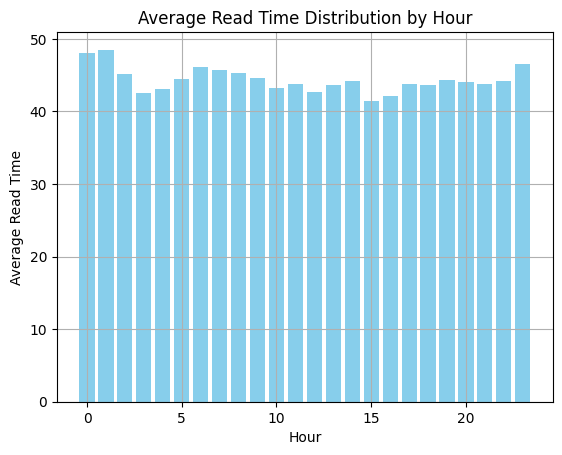

In [93]:
# Calcola la media del tempo di lettura per ogni ora
average_read_time = df_behaviors_train.groupby('hour_day')['read_time'].mean()

# Grafico a barre raggruppate
plt.bar(average_read_time.index, average_read_time.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Average Read Time')
plt.title('Average Read Time Distribution by Hour')
plt.grid(True)
plt.show()

In [94]:

# Aggiungi una nuova colonna per il giorno della settimana (0 = Lunedì, 1 = Martedì, ..., 6 = Domenica)
df_behaviors_train['giorno_settimana'] = df_behaviors_train['impression_time'].dt.dayofweek

df_behaviors_train

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage,hour_day,giorno_settimana
0,47727,NaN,2023-05-21 21:35:07,20.0,NaN,1,"[9482380, 9775183, 9744403, 9775297, 9774020, ...",[9775183],18293,False,NaN,NaN,NaN,False,265,34.0,100.0,21,6
1,47731,NaN,2023-05-21 21:32:33,13.0,NaN,1,"[9774557, 9774516, 9775331, 9775277, 9759966]",[9759966],18293,False,NaN,NaN,NaN,False,265,45.0,100.0,21,6
2,47736,NaN,2023-05-21 21:33:32,17.0,NaN,1,"[9759966, 9774557, 9775352, 9746360, 9772601, ...",[9774652],18293,False,NaN,NaN,NaN,False,265,78.0,100.0,21,6
3,47737,NaN,2023-05-21 21:38:17,27.0,NaN,1,"[9774580, 9775131, 9775202, 9774789, 9774972, ...",[9775184],18293,False,NaN,NaN,NaN,False,265,6.0,52.0,21,6
4,47740,NaN,2023-05-21 21:36:02,48.0,NaN,1,"[9774826, 9775171, 9775076, 9769624, 9775056, ...",[9774648],18293,False,NaN,NaN,NaN,False,265,32.0,100.0,21,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12063885,580100982,NaN,2023-05-18 10:27:05,9.0,NaN,1,"[9142581, 9233208, 9345280, 9486080, 9769306, ...",[9769306],2111769,False,NaN,NaN,NaN,False,22980659,12.0,36.0,10,3
12063886,580100984,NaN,2023-05-18 10:30:39,13.0,NaN,1,"[9440508, 9142581, 9486080, 9345280, 9720068]",[9720068],2111769,False,NaN,NaN,NaN,False,22980660,30.0,100.0,10,3
12063887,580100987,NaN,2023-05-18 10:27:28,13.0,NaN,1,"[9695098, 9345280, 9142581, 9747757, 9735909, ...",[9735909],2111769,False,NaN,NaN,NaN,False,22980659,19.0,24.0,10,3
12063888,580100996,NaN,2023-05-18 10:08:18,35.0,NaN,2,"[9769917, 9771126, 9345280, 9233208, 9771166, ...",[9771126],2111774,False,NaN,NaN,NaN,False,71230199,14.0,22.0,10,3


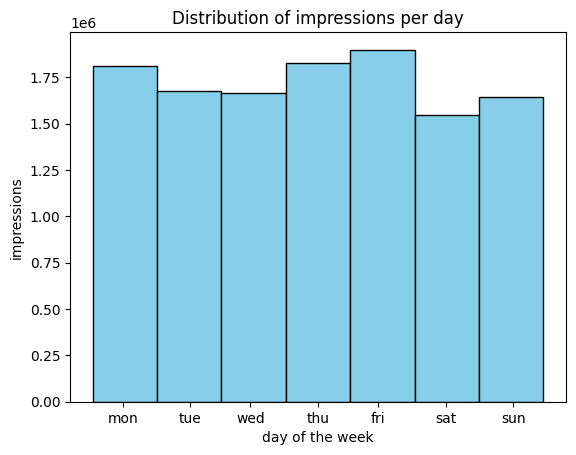

In [95]:
# Plot the distribution
plt.hist(df_behaviors_train['giorno_settimana'], bins=7, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('day of the week')
plt.ylabel('impressions')
#plt.yscale('log')
plt.title('Distribution of impressions per day')
plt.xticks([0.4,1.3,2.1,3.0,3.8,4.7,5.6], ["mon","tue","wed","thu","fri","sat","sun"])
plt.grid(False)
plt.show()

In [96]:
df_behaviors_train.columns

Index(['impression_id', 'article_id', 'impression_time', 'read_time',
       'scroll_percentage', 'device_type', 'article_ids_inview',
       'article_ids_clicked', 'user_id', 'is_sso_user', 'gender', 'postcode',
       'age', 'is_subscriber', 'session_id', 'next_read_time',
       'next_scroll_percentage', 'hour_day', 'giorno_settimana'],
      dtype='object')

In [129]:
media_read_time = df_behaviors_train.groupby(['giorno_settimana', 'hour_day'])['read_time'].mean().unstack()
media_read_time

hour_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
giorno_settimana,,,,,,,,,,,,,,,,,,,,,
0,46.777245,48.728527,44.229797,39.089733,37.826950,41.788017,46.641788,50.129089,47.178978,47.618622,...,41.474407,39.513092,41.436775,42.324978,45.078053,45.258282,42.134380,38.716938,40.588032,43.484440
1,44.483459,42.990826,40.393505,40.013390,43.370163,43.812824,44.913979,46.160839,46.743076,42.978302,...,45.092674,40.143890,41.194363,42.795250,41.513508,39.685417,40.511383,39.458103,39.783855,43.245094
2,44.196003,43.262608,40.528210,38.445820,39.201073,42.524994,48.053272,45.173649,44.048260,48.066547,...,46.442425,44.366680,44.312263,42.659554,40.654373,45.077717,44.965778,44.931763,45.120438,47.757797
3,48.977234,49.894493,45.430710,43.183323,42.558510,46.017582,47.258438,47.408535,47.644886,45.599064,...,44.720390,44.311890,48.219685,48.664654,44.662106,43.569901,43.601933,43.765903,41.925484,43.884510
4,48.692265,47.970406,46.055759,45.023571,43.003960,42.177883,43.659286,42.010189,41.175823,38.212040,...,36.530872,36.275860,37.205585,40.136894,43.872406,44.373455,45.206989,46.199802,47.458904,50.487862
5,50.336132,54.305088,52.048904,51.847591,49.028198,44.409294,45.550873,44.283253,43.873352,43.350254,...,51.109543,47.480267,42.875786,46.521351,46.985657,46.651684,48.313625,45.953152,46.566925,47.149792
6,50.741917,52.988369,53.039711,50.990631,54.291286,50.494446,47.550522,45.803547,46.912891,47.351868,...,44.120750,39.370434,39.746838,42.643394,43.665531,45.734535,44.961105,45.932861,46.058338,48.419132


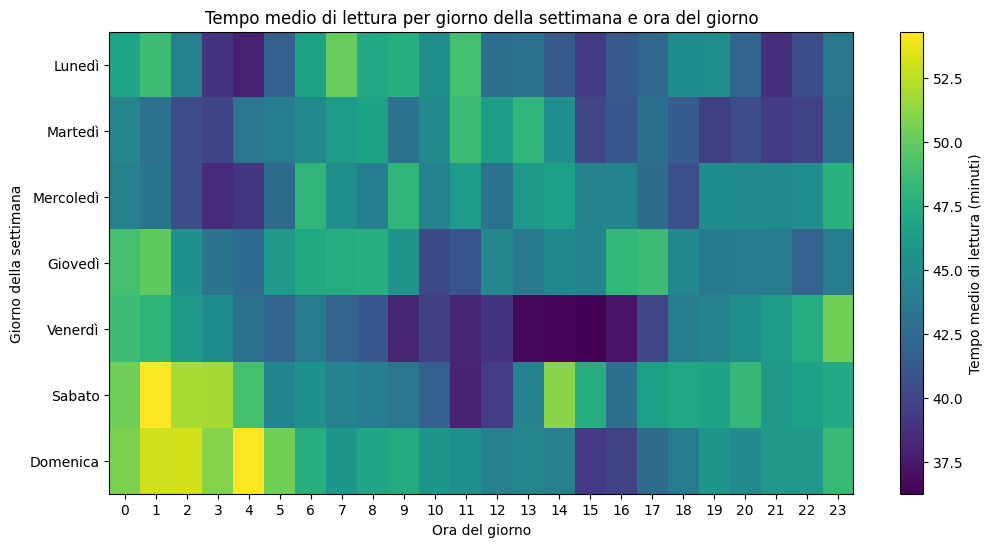

In [98]:
# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.imshow(media_read_time, cmap='viridis', aspect='auto')
plt.colorbar(label='Tempo medio di lettura (minuti)')
plt.xlabel('Ora del giorno')
plt.ylabel('Giorno della settimana')
plt.title('Tempo medio di lettura per giorno della settimana e ora del giorno')
plt.xticks(range(24), labels=[f'{hour}' for hour in range(24)])
plt.yticks(range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.grid(False)
plt.show()

In [99]:
df_behaviors_train.columns

Index(['impression_id', 'article_id', 'impression_time', 'read_time',
       'scroll_percentage', 'device_type', 'article_ids_inview',
       'article_ids_clicked', 'user_id', 'is_sso_user', 'gender', 'postcode',
       'age', 'is_subscriber', 'session_id', 'next_read_time',
       'next_scroll_percentage', 'hour_day', 'giorno_settimana'],
      dtype='object')

In [100]:
conteggio_impressions = df_behaviors_train.groupby(['giorno_settimana', 'hour_day'])['impression_id'].count().unstack()
conteggio_impressions

hour_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
giorno_settimana,,,,,,,,,,,,,,,,,,,,,
0,7735,9408,19835,63277,117127,113070,105753,98048,81597,88631,...,89967,98507,86651,91219,95425,100371,104443,53271,25519,12049
1,9703,10683,21799,62740,100869,102016,101357,88007,77829,81801,...,87650,86079,73270,80683,84904,100291,90838,52868,22841,11465
2,8454,9973,19780,55446,95607,103011,97909,94477,65913,69498,...,79268,74776,73207,91456,103745,120269,91432,64040,30140,13530
3,9883,10606,21453,60712,102650,107502,90869,118291,84029,77037,...,88226,88727,82204,107027,112082,106994,111592,78348,40488,18781
4,12124,11522,18149,45099,95992,143981,150073,127764,96671,84031,...,85416,89168,87496,93219,91508,94469,95653,63903,36378,17179
5,10832,8945,11717,26383,60819,110493,128333,114082,80231,55882,...,81620,82352,83808,83901,75435,79566,76445,69735,40732,20849
6,12740,10747,12943,25726,58928,113879,146448,119992,80955,68131,...,85713,91139,85206,91939,112405,91006,79213,46843,20912,10443


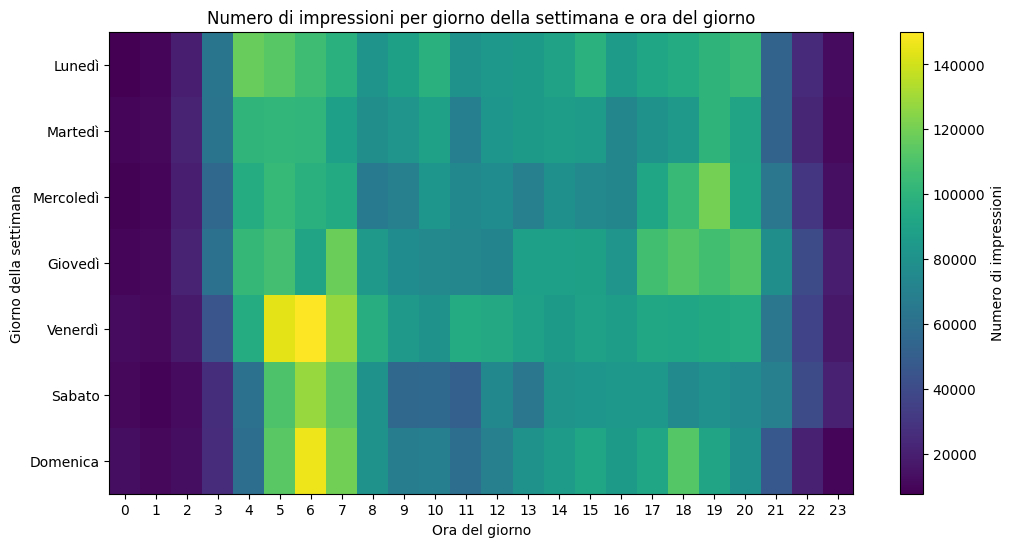

In [101]:
# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.imshow(conteggio_impressions, cmap='viridis', aspect='auto')
plt.colorbar(label='Numero di impressioni')
plt.xlabel('Ora del giorno')
plt.ylabel('Giorno della settimana')
plt.title('Numero di impressioni per giorno della settimana e ora del giorno')
plt.xticks(range(24), labels=[f'{hour}' for hour in range(24)])
plt.yticks(range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.grid(False)
plt.show()

In [132]:
peso_impressioni = conteggio_impressions / df_behaviors_train.shape[0]

In [133]:
# Calcolare il tempo medio di lettura ponderato
tempo_ponderato = media_read_time.mul(peso_impressioni, axis=1)



In [134]:
tempo_ponderato

hour_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
giorno_settimana,,,,,,,,,,,,,,,,,,,,,
0,0.029992,0.038001,0.072721,0.205032,0.367258,0.391662,0.408866,0.407419,0.319106,0.349845,...,0.309297,0.322642,0.297627,0.320033,0.356566,0.376547,0.364778,0.170964,0.085857,0.043431
1,0.035778,0.038070,0.072990,0.208095,0.362628,0.370495,0.377353,0.336747,0.301558,0.291421,...,0.327620,0.286437,0.250194,0.286214,0.292166,0.329918,0.305040,0.172919,0.075324,0.041098
2,0.030971,0.035764,0.066450,0.176698,0.310671,0.363112,0.389994,0.353772,0.240665,0.276903,...,0.305158,0.274999,0.268899,0.323401,0.349613,0.449395,0.340795,0.238516,0.112727,0.053562
3,0.040123,0.043865,0.080789,0.217322,0.362125,0.410065,0.355965,0.464859,0.331862,0.291184,...,0.327050,0.325903,0.328572,0.431737,0.414942,0.386419,0.403322,0.284234,0.140707,0.068319
4,0.048935,0.045816,0.069287,0.168314,0.342181,0.503388,0.543115,0.444914,0.329952,0.266166,...,0.258650,0.268126,0.269842,0.310142,0.332785,0.347476,0.358440,0.244723,0.143110,0.071895
5,0.045196,0.040266,0.050552,0.113388,0.247171,0.406744,0.484560,0.418764,0.291780,0.200806,...,0.345789,0.324116,0.297859,0.323543,0.293799,0.307686,0.306148,0.265631,0.157227,0.081485
6,0.053586,0.047204,0.056905,0.108736,0.265194,0.476650,0.577233,0.455579,0.314810,0.267420,...,0.313474,0.297432,0.280728,0.324986,0.406853,0.345006,0.295220,0.178353,0.079839,0.041914


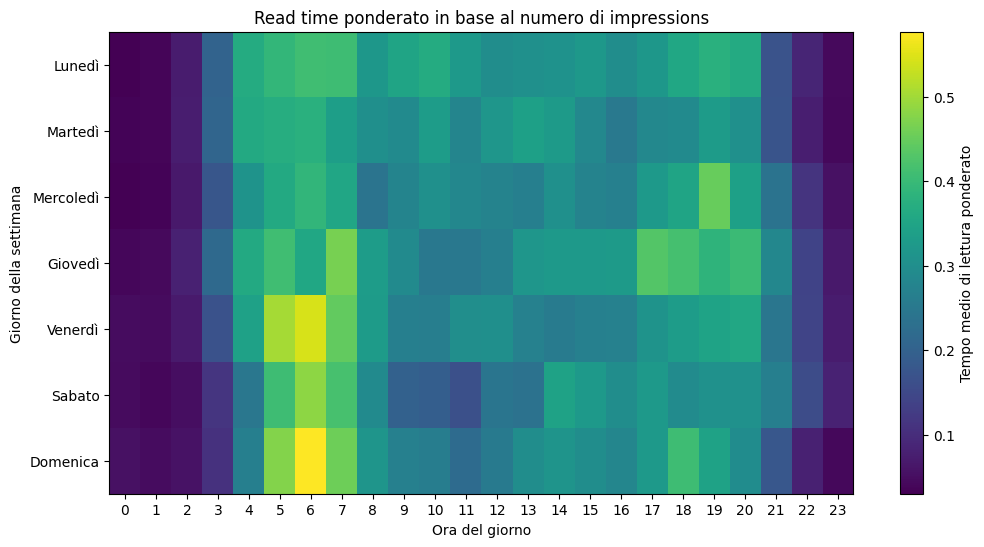

In [137]:
# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.imshow(tempo_ponderato, cmap='viridis', aspect='auto')
plt.colorbar(label='Tempo medio di lettura ponderato')
plt.xlabel('Ora del giorno')
plt.ylabel('Giorno della settimana')
plt.title('Read time ponderato in base al numero di impressions')
plt.xticks(range(24), labels=[f'{hour}' for hour in range(24)])
plt.yticks(range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.grid(False)
plt.show()

In [102]:
df_behaviors_train['lunghezza_lista'] = df_behaviors_train['article_ids_clicked'].apply(lambda x: len(x))
df_behaviors_train


,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage,hour_day,giorno_settimana,lunghezza_lista
0,47727,NaN,2023-05-21 21:35:07,20.0,NaN,1,"[9482380, 9775183, 9744403, 9775297, 9774020, ...",[9775183],18293,False,NaN,NaN,NaN,False,265,34.0,100.0,21,6,1
1,47731,NaN,2023-05-21 21:32:33,13.0,NaN,1,"[9774557, 9774516, 9775331, 9775277, 9759966]",[9759966],18293,False,NaN,NaN,NaN,False,265,45.0,100.0,21,6,1
2,47736,NaN,2023-05-21 21:33:32,17.0,NaN,1,"[9759966, 9774557, 9775352, 9746360, 9772601, ...",[9774652],18293,False,NaN,NaN,NaN,False,265,78.0,100.0,21,6,1
3,47737,NaN,2023-05-21 21:38:17,27.0,NaN,1,"[9774580, 9775131, 9775202, 9774789, 9774972, ...",[9775184],18293,False,NaN,NaN,NaN,False,265,6.0,52.0,21,6,1
4,47740,NaN,2023-05-21 21:36:02,48.0,NaN,1,"[9774826, 9775171, 9775076, 9769624, 9775056, ...",[9774648],18293,False,NaN,NaN,NaN,False,265,32.0,100.0,21,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12063885,580100982,NaN,2023-05-18 10:27:05,9.0,NaN,1,"[9142581, 9233208, 9345280, 9486080, 9769306, ...",[9769306],2111769,False,NaN,NaN,NaN,False,22980659,12.0,36.0,10,3,1
12063886,580100984,NaN,2023-05-18 10:30:39,13.0,NaN,1,"[9440508, 9142581, 9486080, 9345280, 9720068]",[9720068],2111769,False,NaN,NaN,NaN,False,22980660,30.0,100.0,10,3,1
12063887,580100987,NaN,2023-05-18 10:27:28,13.0,NaN,1,"[9695098, 9345280, 9142581, 9747757, 9735909, ...",[9735909],2111769,False,NaN,NaN,NaN,False,22980659,19.0,24.0,10,3,1
12063888,580100996,NaN,2023-05-18 10:08:18,35.0,NaN,2,"[9769917, 9771126, 9345280, 9233208, 9771166, ...",[9771126],2111774,False,NaN,NaN,NaN,False,71230199,14.0,22.0,10,3,1


In [103]:
df_behaviors_train['lunghezza_lista'].value_counts()

lunghezza_lista
1     12004156
2        53705
3         3566
4         1258
5          597
6          358
7          209
8           28
9           11
10           2
Name: count, dtype: int64

In [104]:
mean_len_hour = df_behaviors_train.groupby(['giorno_settimana', 'hour_day'])['lunghezza_lista'].mean().unstack()
mean_len_hour

hour_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
giorno_settimana,,,,,,,,,,,,,,,,,,,,,
0,1.005818,1.005102,1.004739,1.005800,1.004738,1.006147,1.007754,1.007965,1.007868,1.007638,...,1.005769,1.004863,1.004847,1.005799,1.005334,1.006516,1.003839,1.004637,1.003840,1.004482
1,1.005153,1.003557,1.004541,1.003809,1.003728,1.005627,1.007508,1.007806,1.008403,1.007310,...,1.006811,1.005809,1.005978,1.005986,1.006867,1.005125,1.004492,1.003764,1.004115,1.004884
2,1.004968,1.004211,1.004297,1.004004,1.003556,1.005281,1.006904,1.007229,1.007146,1.006274,...,1.005803,1.006352,1.005669,1.004986,1.005311,1.004739,1.004473,1.004622,1.005508,1.003843
3,1.005666,1.005469,1.004894,1.004727,1.004842,1.006102,1.007549,1.004573,1.004784,1.005802,...,1.007912,1.007720,1.005511,1.006718,1.005639,1.005907,1.005744,1.004442,1.003631,1.003301
4,1.004454,1.005989,1.004243,1.005277,1.004511,1.004778,1.005757,1.006504,1.006238,1.007366,...,1.008113,1.007009,1.005737,1.005857,1.006065,1.004943,1.004109,1.004303,1.002859,1.003784
5,1.004708,1.003689,1.004267,1.004321,1.005294,1.004887,1.004558,1.003962,1.004412,1.004384,...,1.005232,1.006193,1.006145,1.005900,1.007675,1.007026,1.005272,1.004173,1.003167,1.003070
6,1.003297,1.002885,1.003940,1.004820,1.004701,1.003811,1.003640,1.004225,1.005102,1.004990,...,1.005903,1.004850,1.005469,1.005253,1.004297,1.004626,1.004810,1.005123,1.005451,1.006990


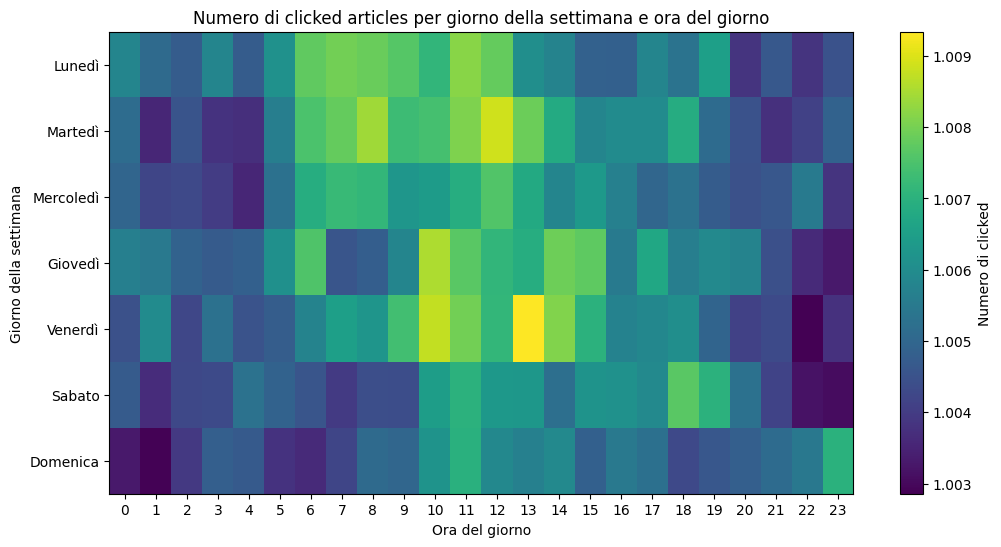

In [105]:
# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.imshow(mean_len_hour, cmap='viridis', aspect='auto')
plt.colorbar(label='Numero di clicked')
plt.xlabel('Ora del giorno')
plt.ylabel('Giorno della settimana')
plt.title('Numero di clicked articles per giorno della settimana e ora del giorno')
plt.xticks(range(24), labels=[f'{hour}' for hour in range(24)])
plt.yticks(range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.grid(False)
plt.show()

In [106]:
df_behaviors_train.groupby('gender')['read_time'].mean()

gender
0.0    49.652863
1.0    50.899456
2.0    20.464285
Name: read_time, dtype: float32

In [107]:
df_behaviors_train.groupby('gender')['scroll_percentage'].mean()

gender
0.0    99.468475
1.0    99.529541
2.0          NaN
Name: scroll_percentage, dtype: float32

In [108]:
df_scroll = df_behaviors_train[df_behaviors['scroll_percentage'] != 100][['gender', 'scroll_percentage']]

In [109]:
df_scroll = df_scroll.dropna()

In [110]:
df_scroll = df_scroll[df_scroll['scroll_percentage'] != 0]
df_scroll

,gender,scroll_percentage
23167,0.0,76.0
23172,0.0,86.0
23498,0.0,27.0
23521,0.0,16.0
23742,0.0,78.0
...,...,...
11972553,0.0,40.0
11974312,0.0,50.0
11974384,0.0,39.0
11977708,0.0,44.0


In [111]:
df_scroll['scroll_percentage'].value_counts()

scroll_percentage
98.0    64
57.0    57
89.0    56
91.0    56
90.0    54
        ..
7.0      8
3.0      1
4.0      1
5.0      1
6.0      1
Name: count, Length: 97, dtype: int64

In [112]:
correlation = df_scroll['gender'].corr(df_scroll['scroll_percentage'])
correlation

-0.016371741200665854

<Axes: >

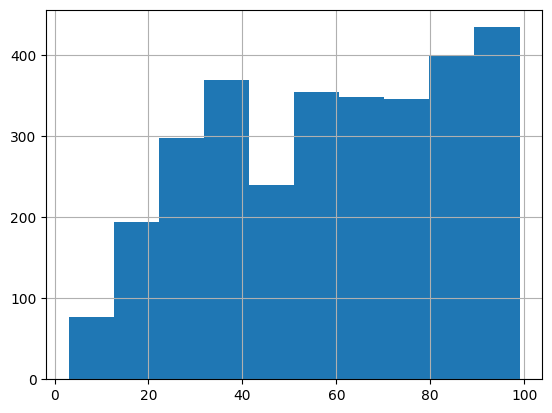

In [113]:
df_male = df_scroll[df_scroll['gender'] == 0]['scroll_percentage']
df_male.hist()